# **Gen AI Project: Generative Search System (Mr.HelpMate AI)**

### **Project Overview:**

### **Introduction:**

<div align="justify"> Traditional search methods often struggle with efficiently extracting relevant information from complex and extensive documents, also leads to time-consuming, inaccurate, and unreliable results. To address these issues, we will develop a comprehensive and robust AI-based generative search system which will be capable of effectively and accurately answering questions from a PDF document. This innovative approach allows users to pose precise, context-aware questions and receive accurate answers directly from the text. By improving efficiency, accuracy, and accessibility, the system enhances document management and data retrieval, which may be useful in various sectors such as legal, financial, medical, and academic etc.<br>

This system will utilize the Retrieval Augmented Generation (RAG) pipeline, which combines embedding, search and ranking, and generative layers to provide comprehensive and contextually relevant answers. </div>

### **Retrieval-Augmented Generation (RAG):**
<div align="justify"> RAG is the process of optimizing the output of a large language model, so it references an authoritative knowledge base outside of its training data sources before generating a response. Large Language Models (LLMs) are trained on vast volumes of data and use billions of parameters to generate original output for tasks like answering questions, translating languages, and completing sentences. It is a cost-effective approach to improving LLM output, so it remains relevant, accurate, and useful in various contexts.</div>

### **Objective:**
<div align="justify"> The main objective of this project is to develop a robust generative search system which will be capable of effectively and accurately answering questions from a document. i.e. PDF document.</div>

### **Document or Data Source:**
#### **Document:**
- The project will use a single long life insurance policy document titled "Principal-Sample-Life-Insurance-Policy"

#### **File Format:**
- The document is provided in PDF format.

### **System Architecture:**
The project is based on the Retrieval Augmented Generation (RAG) pipeline which is structured into three main layers:

-  Embedding Layer
-  Search Layer
-  Generation Layer

Each layer plays a critical role to ensure the system's ability to accurately retrieve and generate responses from the pdf document.

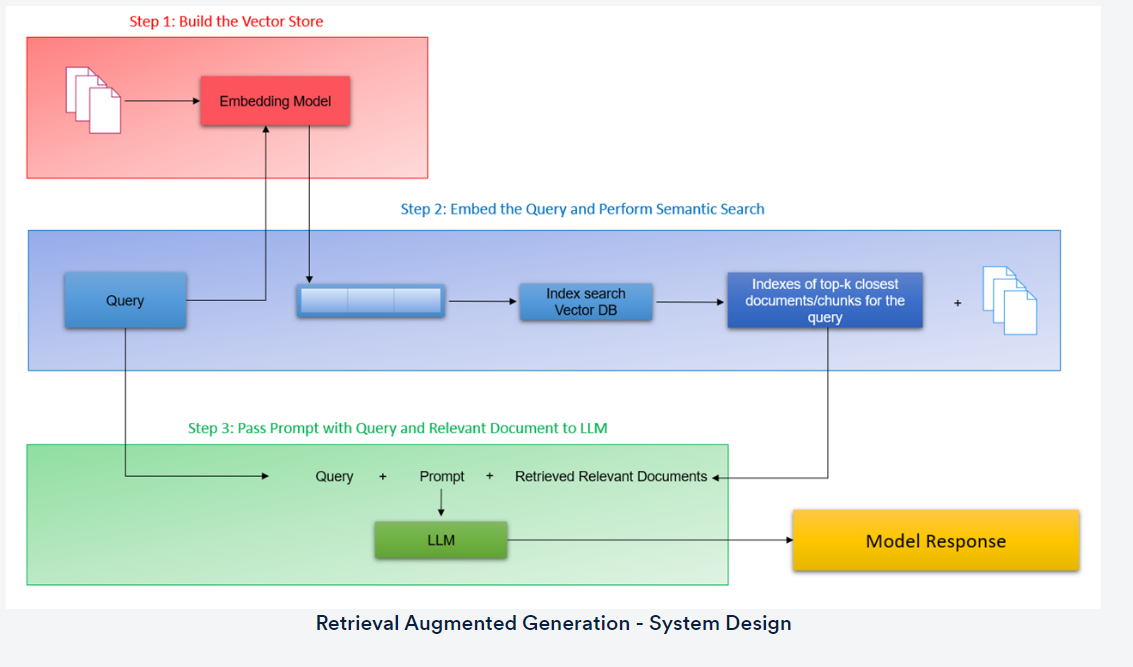

### **1. Embedding Layer:**

<div align="justify"> The embedding layer is the first layer of a RAG model, and it contains an embedding model that is trained on a massive data set of text and code. Embedding layer is responsible for processing text from document and converting it into meaningful vector embeddings using different chunking strategies and embedding models. This layer is an important part of RAG models because it allows our system to understand the meaning of the text that it is processing and understand its semantic relationship to the query. The embedding layer generates embeddings for our text corpus and allows the RAG model to understand the meaning of the query and to generate a relevant and informative response.<br>

#### **Document Processing:**
The PDF document will be processed, cleaned, and chunked into smaller parts for embedding.<br>

#### **Chunking Strategy:**
Several chunking strategies will be tested to find the optimal method that balances the trade-off between chunk size and information retention.<br>

#### **Embedding Models:**
Embedding models from Hugging face will be evaluated. Here we focus on selecting the model that provides the most accurate, reliable and contextually relevant embeddings for the chunks.<br>

###**2. Search and Rank Layer:**
The next layer or second layer is the search and rank or the re-rank layer. Search layer focuses on embedding the queries, performing a vector search using ChromaDB, implementing cache mechanism, and applying re-ranking to retrieve the most relevant information or responses. This layer is an essential component of RAG because it ensures that the retrieved text is accurate, relevant and contextually appropriate. This layer typically consists of two components: A search component that uses various techniques to retrieve relevant documents from the knowledge base and a re-rank component that uses a variety of techniques to re-rank the retrieved documents to produce the most relevant results.<br>

#### **Query Design:**
In search and rank layer some queries will be created based on the content of the policy document. These queries will be designed to test the system’s ability to retrieve relevant information.<br>

#### **Query Embedding and Search:**
Queries will be embedded and searched against the ChromaDB vector database. The search results will be ranked, and the top results will be selected for further processing.<br>

#### **Cache Mechanism:**
A Cache mechanism will be implemented to store and retrieve frequently accessed queries efficiently.<br>

#### **Re-Ranking:**
The search results will be re-ranked using cross-encoding models from Hugging Face to ensure the most relevant chunks are selected.<br>

### **3. Generation Layer:**
The generation layer is the last layer of a RAG model which consists of a foundation large language model that is trained on a massive data set of text and code. Generation layer generates the final answers using a comprehensive prompt designed to leverage the retrieved chunks and optimize response quality.<br>

#### **Prompt Design:**
A detailed and exhaustive prompt will be created to guide Large Language Model (LLM) in generating the responses.<br>

#### **Few-Shot Examples:**
To improve the quality of the generated answers, few-shot examples may be included in the prompt.<br>

#### **Final Output:**
The system will generate a final answer for each query based on the retrieved information.<div/>

### **Importing The Necessary Libraries:**

In [1]:
# To install necessary Python packages for the project:
!pip install -U -q pdfplumber tiktoken openai chromaDB sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 10.6 MB/s eta 0

In [2]:
# To import all the required libraries:

# Standard library imports
# To handle file system paths
from pathlib import Path
# To work with JSON data
import json

# Third-party imports
# To extract text and metadata from PDF documents:
import pdfplumber
# To manipulate and analyze data in DataFrames:
import pandas as pd
# To efficiently extract specific fields from objects:
from operator import itemgetter
 # To tokenize text using advanced encoding:
import tiktoken
# To create and manage Chroma vector databases:
import chromadb

In [3]:
# To mount Google Drive for accessing files:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


### **Read, Process, and Chunk the PDF Files:**

- We will utilize pdfplumber for reading and processing PDF files.

- `pdfplumber` allows for better parsing of the PDF file as it can read various elements of the PDF apart from the plain text, such as, tables, images, etc. It also offers wide functionaties and visual debugging features to help with advanced preprocessing as well.

In [4]:
# To define the path of the PDF:
# Path of file location:
pdf_path = '/content/drive/MyDrive/Gen_AI/Principal-Sample-Life-Insurance-Policy.pdf'


### **To read and explore a single PDF file using pdfplumber:**

In [5]:
# To open the PDF file and extract text and tables:
# To open the PDF file using pdfplumber:
with pdfplumber.open(pdf_path) as pdf:

    # To get the page at index 8 (9th page) from the PDF:
    single_page = pdf.pages[8]

    # To extract text from the specified page:
    text = single_page.extract_text()

    # To extract tables from the specified page:
    tables = single_page.extract_tables()

    # To print the extracted text for review:
    print(text)


P ART I - DEFINITIONS
When used in this Group Policy the terms listed below will mean:
Active Work; Actively at Work
A Member will be considered Actively at Work if he or she is able and available for active
performance of all of his or her regular duties. Short term absence because of a regularly
scheduled day off, holiday, vacation day, jury duty, funeral leave, or personal time off is
considered Active Work provided the Member is able and available for active performance of all
of his or her regular duties and was working the day immediately prior to the date of his or her
absence.
Activities of Daily Living (ADL)
a. Bathing - the ability to wash oneself in the tub or shower or by sponge with or without
equipment or adaptive devices.
b. Dressing - the ability to put on and take off garments and medically necessary braces or
artificial limbs usually worn and to fasten or unfasten them.
c. Eating/Feeding - the ability to get nourishment into the body by any means once it has been
prep

In [6]:
# To view the first table on the page, if any:
# To print the first table extracted from the page:
if tables:
    print(tables[0])
else:
    print("No tables found on this page.")


No tables found on this page.


In [7]:
# To define the path of the PDF located:
# To update the path:
single_pdf_path = '/content/drive/MyDrive/Gen_AI/Principal-Sample-Life-Insurance-Policy.pdf'

# To open the PDF file and process all pages:

import pdfplumber

# To open the PDF file using pdfplumber:
with pdfplumber.open(single_pdf_path) as pdf:

    # To loop through all pages in the PDF:
    for i, page in enumerate(pdf.pages):
        # To extract text from the current page:
        text = page.extract_text()

        # To extract tables from the current page:
        tables = page.extract_tables()

        # To print the text from the current page:
        print(f"Page {i + 1} Text:")
        print(text)

        # To check if there are tables and print them:
        if tables:
            print(f"Page {i + 1} Tables:")
            for table in tables:
                print(table)
        else:
            print("No tables found on this page.")


Page 1 Text:
DOROTHEA GLAUSE S655
RHODE ISLAND JOHN DOE 01/01/2014
711 HIGH STREET
GEORGE RI 02903
GROUP POLICY FOR:
RHODE ISLAND JOHN DOE
ALL MEMBERS
Group Member Life Insurance
Print Date: 07/16/2014
No tables found on this page.
Page 2 Text:
This page left blank intentionally
No tables found on this page.
Page 3 Text:
POLICY RIDER
GROUP INSURANCE
POLICY NO: S655
COVERAGE: Life
EMPLOYER: RHODE ISLAND JOHN DOE
Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following
will apply to your Policy:
From time to time The Principal may offer or provide certain employer groups who apply
for coverage with The Principal a Financial Services Hotline and Grief Support Services or
any other value added service for the employees of that employer group. In addition, The
Principal may arrange for third party service providers (i.e., optometrists, health clubs), to
provide discounted goods and services to those employer groups who apply for coverage
with The Prin

### **To Extract text from PDF:**

- Let's proceed by reading the documents, extracting text from them with the necessary preprocessing steps, and storing the results in a DataFrame.


In [8]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables:
def check_bboxes(word, table_bbox):
    # To check whether word is inside a table bbox:
    l = word['x0'], word['top'], word['x1'], word['bottom']
    r = table_bbox
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

In [9]:
# Function to extract text from a PDF file.
# 1. Declare a variable p to store the iteration of the loop that will help us store page numbers alongside the text
# 2. Declare an empty list 'full_text' to store all the text files
# 3. Use pdfplumber to open the pdf pages one by one
# 4. Find the tables and their locations in the page
# 5. Extract the text from the tables in the variable 'tables'
# 6. Extract the regular words by calling the function check_bboxes() and checking whether words are present in the table or not
# 7. Use the cluster_objects utility to cluster non-table and table words together so that they retain the same chronology as in the original PDF
# 8. Declare an empty list 'lines' to store the page text
# 9. If a text element in present in the cluster, append it to 'lines', else if a table element is present, append the table
# 10. Append the page number and all lines to full_text, and increment 'p'
# 11. When the function has iterated over all pages, return the 'full_text' list

def extract_text_from_pdf(pdf_path):

    # Extracts text and tables from a PDF file and organizes them by page.


    # To initialize page counter and list to store extracted text:
    p = 0
    full_text = []

    # To open the PDF file using pdfplumber:
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            # To store the page number:
            page_no = f"Page {p + 1}"

            # To extract text from the page:
            text = page.extract_text()

            # To find tables and their bounding boxes in the page:
            tables = page.find_tables()
            table_bboxes = [i.bbox for i in tables]
            tables = [{'table': i.extract(), 'top': i.bbox[1]} for i in tables]

            # To extract words not inside tables:
            non_table_words = [word for word in page.extract_words() if not any(
                [check_bboxes(word, table_bbox) for table_bbox in table_bboxes])]

            # To initialize list to store lines of text:
            lines = []

            # To cluster non-table words and table data by their vertical position:
            for cluster in pdfplumber.utils.cluster_objects(non_table_words + tables, itemgetter('top'), tolerance=5):

                # To append text elements to lines:
                if 'text' in cluster[0]:
                    try:
                        lines.append(' '.join([i['text'] for i in cluster]))
                    except KeyError:
                        pass

                # To append table elements to lines in JSON format:
                elif 'table' in cluster[0]:
                    lines.append(json.dumps(cluster[0]['table']))

            # To append the page number and the combined text to full_text:
            full_text.append([page_no, " ".join(lines)])
            p += 1

    return full_text


- Now that we have defined the function for extracting the text and tables from a PDF, let's iterate and call this function for all the PDFs in our drive and store them in a list.

In [10]:
# To specify the file path to the PDF as a string:
pdf_path = '/content/drive/MyDrive/Gen_AI/Principal-Sample-Life-Insurance-Policy.pdf'

# To begin processing the PDF file:
print(f"...Processing {pdf_path}")

# To call the function to extract text from the PDF:
extracted_text = extract_text_from_pdf(pdf_path)

# To convert the extracted list to a DataFrame and add a column to store the document name:
extracted_text_df = pd.DataFrame(extracted_text, columns=['Page No.', 'Page_Text'])
extracted_text_df['Document Name'] = pdf_path

# To display a message indicating the progress:
print(f"Finished processing {pdf_path}")

# To confirm that the PDF has been successfully processed:
print("PDF has been processed.")


...Processing /content/drive/MyDrive/Gen_AI/Principal-Sample-Life-Insurance-Policy.pdf
Finished processing /content/drive/MyDrive/Gen_AI/Principal-Sample-Life-Insurance-Policy.pdf
PDF has been processed.


In [11]:
# To verify the correctness of the extracted text by inspecting a specific page:
pdf = extracted_text_df.iloc[4]['Page_Text']
pdf

"PRINCIPAL LIFE INSURANCE COMPANY (called The Principal in this Group Policy) Des Moines, Iowa 50392-0002 This group insurance policy is issued to: RHODE ISLAND JOHN DOE (called the Policyholder in this Group Policy) The Date of Issue is November 1, 2007. In return for the Policyholder's application and payment of all premiums when due, The Principal agrees to provide: MEMBER LIFE INSURANCE MEMBER ACCIDENTAL DEATH AND DISMEMBERMENT INSURANCE DEPENDENT LIFE INSURANCE subject to the terms and conditions described in this Group Policy. GROUP POLICY NO. GL S655 RENEWABLE TERM - NON-PARTICIPATING CONTRACT STATE OF ISSUE: RHODE ISLAND This policy has been updated effective January 1, 2014 GC 6000 TITLE PAGE"

In [12]:
# To print the DataFrame to see the extracted data:
print(extracted_text_df)

   Page No.                                          Page_Text  \
0    Page 1  DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...   
1    Page 2                 This page left blank intentionally   
2    Page 3  POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...   
3    Page 4                 This page left blank intentionally   
4    Page 5  PRINCIPAL LIFE INSURANCE COMPANY (called The P...   
..      ...                                                ...   
59  Page 60  I f a Dependent who was insured dies during th...   
60  Page 61  Section D - Claim Procedures Article 1 - Notic...   
61  Page 62  A claimant may request an appeal of a claim de...   
62  Page 63                 This page left blank intentionally   
63  Page 64  Principal Life Insurance Company Des Moines, I...   

                                        Document Name  
0   /content/drive/MyDrive/Gen_AI/Principal-Sample...  
1   /content/drive/MyDrive/Gen_AI/Principal-Sample...  
2   /content/drive/MyDrive/Gen_AI/Princ

In [13]:
pdfs_data = extracted_text_df

In [14]:
pdfs_data

,Page No.,Page_Text,Document Name
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,/content/drive/MyDrive/Gen_AI/Principal-Sample...
1,Page 2,This page left blank intentionally,/content/drive/MyDrive/Gen_AI/Principal-Sample...
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,/content/drive/MyDrive/Gen_AI/Principal-Sample...
3,Page 4,This page left blank intentionally,/content/drive/MyDrive/Gen_AI/Principal-Sample...
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,/content/drive/MyDrive/Gen_AI/Principal-Sample...
...,...,...,...
59,Page 60,I f a Dependent who was insured dies during th...,/content/drive/MyDrive/Gen_AI/Principal-Sample...
60,Page 61,Section D - Claim Procedures Article 1 - Notic...,/content/drive/MyDrive/Gen_AI/Principal-Sample...
61,Page 62,A claimant may request an appeal of a claim de...,/content/drive/MyDrive/Gen_AI/Principal-Sample...
62,Page 63,This page left blank intentionally,/content/drive/MyDrive/Gen_AI/Principal-Sample...


In [15]:
# To display the text of the index 8 to verify its contents:
print(pdfs_data.Page_Text.iloc[8])


P ART I - DEFINITIONS When used in this Group Policy the terms listed below will mean: Active Work; Actively at Work A Member will be considered Actively at Work if he or she is able and available for active performance of all of his or her regular duties. Short term absence because of a regularly scheduled day off, holiday, vacation day, jury duty, funeral leave, or personal time off is considered Active Work provided the Member is able and available for active performance of all of his or her regular duties and was working the day immediately prior to the date of his or her absence. Activities of Daily Living (ADL) a. Bathing - the ability to wash oneself in the tub or shower or by sponge with or without equipment or adaptive devices. b. Dressing - the ability to put on and take off garments and medically necessary braces or artificial limbs usually worn and to fasten or unfasten them. c. Eating/Feeding - the ability to get nourishment into the body by any means once it has been prep

In [16]:
# To check the length of all the texts as there might be some empty pages or pages with very few words that we can drop:
pdfs_data['Text_Length'] = pdfs_data['Page_Text'].apply(lambda x: len(x.split(' ')))

In [17]:
pdfs_data['Text_Length']

,Text_Length
0,30
1,5
2,230
3,5
4,110
...,...
59,285
60,418
61,322
62,5


In [18]:
# To retain only the rows where the text length is at least 10 words:
# This helps filter out pages with very little content:
pdfs_data = pdfs_data.loc[
    pdfs_data['Text_Length'] >= 10
]

# To display the filtered data:
pdfs_data


,Page No.,Page_Text,Document Name,Text_Length
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,30
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,230
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,110
5,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,153
6,Page 7,Section A – Eligibility Member Life Insurance ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,176
7,Page 8,Section A - Member Life Insurance Schedule of ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,171
8,Page 9,P ART I - DEFINITIONS When used in this Group ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,387
9,Page 10,T he legally recognized union of two eligible ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,251
10,Page 11,(2) has been placed with the Member or spouse ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,299
11,Page 12,An institution that is licensed as a Hospital ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,352


In [19]:
# To create a new column 'Metadata' to store metadata for each page:
# Metadata includes 'Policy_Name' (derived from 'Document Name') and 'Page_No.' from 'Page No.':

pdfs_data['Metadata'] = pdfs_data.apply(
    lambda x: {
        'Policy_Name': x['Document Name'][:-4],  # To extract policy name by removing the file extension
        'Page_No.': x['Page No.']  # Include the page number
    },
    axis=1  # To apply the function row-wise
)


<ipython-input-19-e1ddec07fc78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdfs_data['Metadata'] = pdfs_data.apply(


In [20]:
pdfs_data

,Page No.,Page_Text,Document Name,Text_Length,Metadata
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,30,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,230,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,110,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
5,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,153,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
6,Page 7,Section A – Eligibility Member Life Insurance ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,176,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
7,Page 8,Section A - Member Life Insurance Schedule of ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,171,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
8,Page 9,P ART I - DEFINITIONS When used in this Group ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,387,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
9,Page 10,T he legally recognized union of two eligible ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,251,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
10,Page 11,(2) has been placed with the Member or spouse ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,299,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...
11,Page 12,An institution that is licensed as a Hospital ...,/content/drive/MyDrive/Gen_AI/Principal-Sample...,352,{'Policy_Name': '/content/drive/MyDrive/Gen_AI...


This concludes the chunking aspect also, as we can see that mostly the pages contain few hundred words, maximum going upto 500. So, we don't need to chunk the documents further; we can perform the embeddings on individual pages. This strategy makes sense for 2 reasons:
- The way insurance documents are generally structured, you will not have a lot of extraneous information in a page, and all the text pieces in that page will likely be interrelated.
- We want to have larger chunk sizes to be able to pass appropriate context to the LLM during the generation layer.

### **Generate and Store Embeddings using Hugging face and ChromaDB:**

- Here, we will embed the pages in the DataFrame using Hugging face's sentence-transformers/all-MiniLM-L6-v2 model and store the embeddings in a ChromaDB collection.

In [21]:
# To set the API key:
filepath = "/content/drive/MyDrive/Gen_AI/"
with open(filepath + "API_Key.txt", "r") as f:
    hf_api_key = ' '.join(f.readlines()).strip()

In [22]:

# To import necessary libraries:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import chromadb

In [23]:
# To define the path where chroma collections will be stored:
chroma_data_path = '/content/drive/MyDrive/Gen_AI/ChromaDB_Data'

In [24]:
# To initialize the PersistentClient for Chroma:
client = chromadb.PersistentClient()

In [25]:
# To set up the tokenizer and model from Hugging Face:
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [26]:
# Custom embedding function:
def compute_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

In [27]:
# To initialize or get the collection in Chroma:
pdf_collection = client.get_or_create_collection(name='RAG_on_pdf')

In [28]:
# To convert the page text and metadata from your dataframe to lists:
documents_list = pdfs_data["Page_Text"].tolist()
metadata_list = pdfs_data['Metadata'].tolist()

In [29]:
# To compute embeddings for documents:
embeddings = compute_embeddings(documents_list)

# To add the documents, embeddings, and metadata to the collection:
pdf_collection.add(
    documents=documents_list,
    embeddings=embeddings,
    ids=[str(i) for i in range(len(documents_list))],
    metadatas=metadata_list
)

# To view the first few entries in the collection:
print(pdf_collection.get(
    ids=['0', '1', '2'],
    include=['embeddings', 'documents', 'metadatas']
))

{'ids': ['0', '1', '2'], 'embeddings': [[0.06768376380205154, 0.3356146216392517, 0.2208300530910492, 0.3644523620605469, 0.387266606092453, 0.41827771067619324, -0.08067145943641663, 0.09208903461694717, -0.4945458471775055, 0.2651635408401489, 0.11066120862960815, -0.04058660939335823, -0.3034752607345581, -0.07639893889427185, -0.1759365200996399, 0.051891110837459564, -0.2504163980484009, 0.08588860929012299, 0.14785408973693848, 0.014034862630069256, 0.16672363877296448, -0.08955763280391693, 0.21490365266799927, 0.14727534353733063, -0.02589106187224388, 0.20348556339740753, -0.0741773471236229, -0.021233979612588882, -0.33151981234550476, 0.27694329619407654, -0.2514216899871826, -0.1689792275428772, -0.2676657736301422, 0.03873300552368164, 0.22690728306770325, -0.3657955527305603, -0.19951191544532776, 0.13224788010120392, -0.36929649114608765, -0.13376235961914062, -0.041762351989746094, 0.38826823234558105, 0.17380493879318237, 0.3033877909183502, -0.5163282155990601, -0.072

In [30]:
# To initialize or get the cache collection in Chroma:
cache_collection = client.get_or_create_collection(name='pdf_Cache')

In [31]:
# Peek at the cache collection:
print(cache_collection.peek())


{'ids': [], 'embeddings': [], 'metadatas': [], 'documents': [], 'uris': None, 'data': None, 'included': ['embeddings', 'metadatas', 'documents']}


### **Semantic Search with Cache:**

- In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

In [32]:
# To read the user query:
query = input("Enter your query: ")

Enter your query: What is life insurance?


In [33]:
# To search the Cache collection first:
cache_results = cache_collection.query(
    query_texts=[query],
    n_results=1
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:00<00:00, 102MiB/s] 


In [34]:
cache_results

{'ids': [[]],
 'distances': [[]],
 'metadatas': [[]],
 'embeddings': None,
 'documents': [[]],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents', 'distances']}

In [35]:
results = pdf_collection.query(
query_texts=query,
n_results=10
)

In [36]:
import pandas as pd
# To set a threshold for cache search:
threshold = 0.2

# To initialize lists for storing results:
ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# To check if the query is found in the cache:
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the main collection if not found or distance is above the threshold:
    results = pdf_collection.query(
        query_texts=[query],
        n_results=10
    )

    # To store the query in the cache collection for future use:
    keys = []
    values = []

    for key, val in results.items():
        if val is None:
            continue
        for i in range(len(val[0])):
            keys.append(f"{key}_{i}")
            values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],  # To assign the query text as ID for cache storage
        metadatas=dict(zip(keys, values))
    )

    print("Not found in cache. Found in main collection.")

    # To prepare DataFrame with results from the main collection:
    result_dict = {
        'IDs': results['ids'][0],
        'Documents': results['documents'][0],
        'Distances': results['distances'][0],
        'Metadatas': results['metadatas'][0]
    }
    results_df = pd.DataFrame.from_dict(result_dict)

else:
    # To process results from the cache:
    cache_result_dict = cache_results['metadatas'][0][0]

    # To extract cache results:
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    print("Found in cache!")

    # To create a DataFrame with cache results:
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })


Not found in cache. Found in main collection.


In [37]:
results_df

,IDs,Documents,Distances,Metadatas
0,30,a . In no event will Dependent Life Insurance ...,2.416755,"{'Page_No.': 'Page 33', 'Policy_Name': '/conte..."
1,18,b . on any date the definition of Member or De...,2.441396,"{'Page_No.': 'Page 21', 'Policy_Name': '/conte..."
2,9,An institution that is licensed as a Hospital ...,2.538814,"{'Page_No.': 'Page 12', 'Policy_Name': '/conte..."
3,51,"f . claim requirements listed in PART IV, Sect...",2.580424,"{'Page_No.': 'Page 54', 'Policy_Name': '/conte..."
4,29,(1) marriage or establishment of a Civil Union...,2.644192,"{'Page_No.': 'Page 32', 'Policy_Name': '/conte..."
5,6,P ART I - DEFINITIONS When used in this Group ...,2.658743,"{'Page_No.': 'Page 9', 'Policy_Name': '/conten..."
6,39,Section F - Individual Purchase Rights Article...,2.664760,"{'Page_No.': 'Page 42', 'Policy_Name': '/conte..."
7,44,"M ember's death, the Death Benefits Payable ma...",2.702161,"{'Page_No.': 'Page 47', 'Policy_Name': '/conte..."
8,45,c . If a beneficiary dies at the same time or ...,2.785600,"{'Page_No.': 'Page 48', 'Policy_Name': '/conte..."
9,26,Insurance for which Proof of Good Health is re...,2.860586,"{'Page_No.': 'Page 29', 'Policy_Name': '/conte..."


### **Re-Ranking with a Cross Encoder:**

- Re-ranking the results obtained from our semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

In [38]:
# To import the CrossEncoder library from sentence_transformers:

from sentence_transformers import CrossEncoder, util

In [39]:
# To initialise the cross encoder model:

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [40]:
# To test the cross encoder model:
# Sample queries and responses to test the cross-encoder model
test_samples = [
    ['What are the conditions covered by the insurance policy?', 'The insurance policy provides coverage for a range of conditions including hospitalization, surgery, and emergency treatments.'],
    ['How does the insurance policy handle claims?', 'Claims are processed within 30 days of submission, and reimbursement is provided according to the policy terms.'],
    ['Is there a waiting period for pre-existing conditions?', 'Yes, there is a waiting period of 2 years for pre-existing conditions to be covered under the insurance policy.'],
    ['What is the coverage for maternity expenses?', 'Maternity expenses are covered up to a certain limit, but there is a waiting period of 9 months before coverage begins.'],
    ['Does the policy include coverage for outpatient treatments?', 'The policy offers limited coverage for outpatient treatments, primarily for consultations and diagnostic tests.'],
    ['Are there any exclusions in the insurance policy?', 'The policy excludes coverage for cosmetic procedures, self-inflicted injuries, and certain high-risk activities.'],
    ['How can I file a claim?', 'To file a claim, you need to submit the required documents and fill out the claim form on the insurance company’s website or visit their office.'],
    ['What is the renewal process for the policy?', 'The policy can be renewed annually, and renewal notices are sent out 30 days before the policy expiration date.']
]

# Predicting scores with the cross-encoder model
scores = cross_encoder.predict(test_samples)

In [41]:
 scores

array([ 8.842746,  1.880099, 10.243086,  5.819674,  9.269489,  3.729639,
        9.210403,  4.93731 ], dtype=float32)

In [42]:
# To input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder:
# To generate the cross_encoder scores for these pairs:

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [43]:
cross_rerank_scores

array([-4.6267843, -4.311347 , -6.9200497, -6.441375 , -5.1429586,
       -9.020979 , -3.1141615, -5.418911 , -9.018262 , -7.4110413],
      dtype=float32)

In [44]:
# To store the rerank_scores in results_df:

results_df['Reranked_scores'] = cross_rerank_scores

In [45]:
results_df

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,30,a . In no event will Dependent Life Insurance ...,2.416755,"{'Page_No.': 'Page 33', 'Policy_Name': '/conte...",-4.626784
1,18,b . on any date the definition of Member or De...,2.441396,"{'Page_No.': 'Page 21', 'Policy_Name': '/conte...",-4.311347
2,9,An institution that is licensed as a Hospital ...,2.538814,"{'Page_No.': 'Page 12', 'Policy_Name': '/conte...",-6.920050
3,51,"f . claim requirements listed in PART IV, Sect...",2.580424,"{'Page_No.': 'Page 54', 'Policy_Name': '/conte...",-6.441375
4,29,(1) marriage or establishment of a Civil Union...,2.644192,"{'Page_No.': 'Page 32', 'Policy_Name': '/conte...",-5.142959
5,6,P ART I - DEFINITIONS When used in this Group ...,2.658743,"{'Page_No.': 'Page 9', 'Policy_Name': '/conten...",-9.020979
6,39,Section F - Individual Purchase Rights Article...,2.664760,"{'Page_No.': 'Page 42', 'Policy_Name': '/conte...",-3.114161
7,44,"M ember's death, the Death Benefits Payable ma...",2.702161,"{'Page_No.': 'Page 47', 'Policy_Name': '/conte...",-5.418911
8,45,c . If a beneficiary dies at the same time or ...,2.785600,"{'Page_No.': 'Page 48', 'Policy_Name': '/conte...",-9.018262
9,26,Insurance for which Proof of Good Health is re...,2.860586,"{'Page_No.': 'Page 29', 'Policy_Name': '/conte...",-7.411041


In [46]:
# To return the top 3 results from semantic search:

top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,30,a . In no event will Dependent Life Insurance ...,2.416755,"{'Page_No.': 'Page 33', 'Policy_Name': '/conte...",-4.626784
1,18,b . on any date the definition of Member or De...,2.441396,"{'Page_No.': 'Page 21', 'Policy_Name': '/conte...",-4.311347
2,9,An institution that is licensed as a Hospital ...,2.538814,"{'Page_No.': 'Page 12', 'Policy_Name': '/conte...",-6.920050


In [47]:
# To return the top 3 results after reranking:
top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
6,39,Section F - Individual Purchase Rights Article...,2.664760,"{'Page_No.': 'Page 42', 'Policy_Name': '/conte...",-3.114161
1,18,b . on any date the definition of Member or De...,2.441396,"{'Page_No.': 'Page 21', 'Policy_Name': '/conte...",-4.311347
0,30,a . In no event will Dependent Life Insurance ...,2.416755,"{'Page_No.': 'Page 33', 'Policy_Name': '/conte...",-4.626784


In [48]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [49]:
top_3_RAG

,Documents,Metadatas
6,Section F - Individual Purchase Rights Article...,"{'Page_No.': 'Page 42', 'Policy_Name': '/conte..."
1,b . on any date the definition of Member or De...,"{'Page_No.': 'Page 21', 'Policy_Name': '/conte..."
0,a . In no event will Dependent Life Insurance ...,"{'Page_No.': 'Page 33', 'Policy_Name': '/conte..."


### **Retrieval Augmented Generation:**

- Now that we have the final top search results, we can pass it to an gpt2, to generate a answer.

In [50]:
from transformers import pipeline

# To initialize the model for text generation or question answering:
generator = pipeline('text-generation', model='gpt2')

def generate_response(query, top_n=3):
    # To generate responses:
    responses = generator(query, max_length=50, num_return_sequences=top_n)

    # To return top responses:
    return [response['generated_text'] for response in responses]

query = query
top_3_RAG = generate_response(query, top_n=3)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [51]:
# To print the response:
print("\n".join(top_3_RAG))

What is life insurance?

Life insurance is a policy you can apply for or purchase and can cover insurance for any medical condition you may have. You will be responsible for all the costs associated with the health care that you receive from a health care
What is life insurance?

Insurance includes everything that a person can rely on for life:

Personal injury medical expenses or medical bills

Ailing child support

Loss of insurance for health insurance benefits

Insurance claims
What is life insurance?

Life insurers are created by the U.S. government. As a part of Medicare, individuals and businesses contribute to Life Insurance premiums.

How do I find out about Life Insurance coverage for my family?



### **Testing and Evaluation:**
<div align="justify"> The system will be tested against the 3 self-designed queries and both search results and final generated answers will be evaluated.<div/>

### **Challenges Faced:**

#### **1. Text Processing Complexity:**
<div align="justify"> Handling large and complex structure of pdf document during text extraction and cleaning is not an easy task, particularly in maintaining context within chunks, determining optimal chunk size and structure for embedding.<br>

#### **2. Model Selection:**
Performance and accuracy also depend on the model. Choosing the best embedding and cross-encoder models required extensive testing to balance computational efficiency with retrieval quality.<br>

#### **3. Prompt Design:**
Creating an effective prompt that guides LLM to generate accurate and context specific answers required significant testing and improvement.<br>

#### **4. System Performance:**
While processing large documents, it is difficult to ensure that the system remains efficient and scalable.<div/>

### **Conclusion:**
<div align="justify"> This project aims to develop a comprehensive and robust generative search system using RAG pipeline. The final system is expected to accurately answer complex queries from a pdf document, which can demonstrate the power of AI in automating and enhancing information retrieval.<div/>

### Technologies Used:
- Python, version 3
- Hugging face
- Transformers
- ChromaDB
- OpenAI API
- LLM
- Google Colab

### **References:**
- Python documentations
- Hugging face documentations
- Stack Overflow
- OpenAI
- Kaggle
- Gen AI Articles
- LLM Articles

### **Contact:**
Created by https://github.com/Erkhanal - feel free to contact!